In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SLx25rBZ7neIb8AL66Lbhwkr2plEPWawh38azrZ4hd9j',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-mzqpgzclht3qgs'
object_key = 'Web Phishing Detection.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
pd.set_option('display.max_columns', None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
data.dropna(subset=['on_mouseover','Iframe'], inplace = True)

In [6]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [7]:
data.shape

(11055, 32)

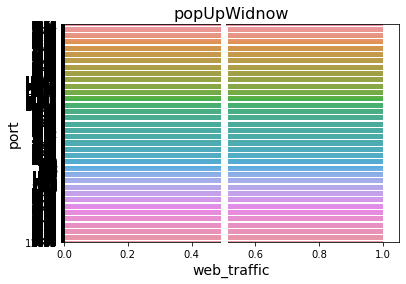

In [8]:
ax = sns.countplot(y = data['index'], order = data['index'].value_counts().index);
ax.set_title("popUpWidnow", fontsize = 16);
ax.set_xlabel("web_traffic", fontsize = 14);
ax.set_ylabel("port", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

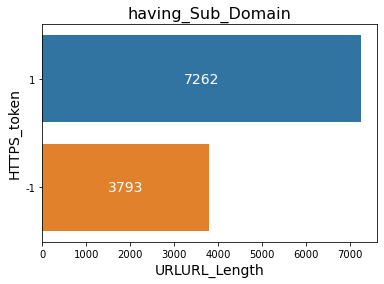

In [9]:
ax = sns.countplot(y = data['having_IPhaving_IP_Address'], order = data['having_IPhaving_IP_Address'].value_counts().index);
ax.set_title("having_Sub_Domain", fontsize = 16);
ax.set_xlabel("URLURL_Length", fontsize = 14);
ax.set_ylabel("HTTPS_token", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

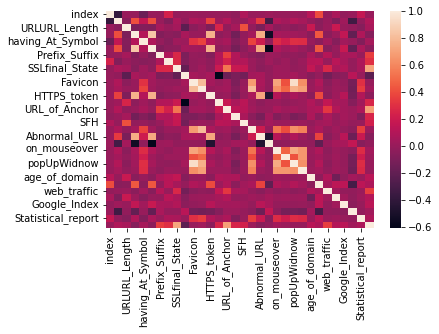

In [10]:
sns.heatmap(data.corr());

In [11]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
data.tail()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,1,1,0,1,1,1,1,-1,1,-1,-1,-1,1,-1,-1


In [13]:
new_data = pd.get_dummies(data, columns = ['SFH','Redirect'])

In [14]:
new_data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,Submitting_to_email,Abnormal_URL,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,SFH_-1,SFH_0,SFH_1,Redirect_0,Redirect_1
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,0,0,1,0
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,1,1,1,1,1,1,-1,-1,0,-1,1,1,1,-1,1,0,0,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,1,1,1,1,1,-1,1,-1,1,0,-1,-1,1,0,0,1,0
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,1,1,1,1,1,1,-1,-1,1,-1,1,-1,1,-1,1,0,0,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,1,1,-1,1,-1,1,-1,-1,0,-1,1,1,1,1,1,0,0,1,0


In [15]:
X =data.drop('Prefix_Suffix', axis=1)
y = data['Prefix_Suffix']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [17]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(max_depth = 4, min_samples_split = 4, random_state = 25)

In [18]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=25)

In [19]:
pred = Classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8788061501356648


In [21]:
Classifier.predict([[1,-1,1,1,1,1,-1,-1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([-1])

# deployment

In [22]:
!pip install -U ibm-watson-machine-learning

In [23]:
from ibm_watson_machine_learning import APIClient

In [24]:
wml_credentials = {
    "apikey":"ndND1GnsU_hl6GQC4b4raYiN5mu8FIok2q_U0H_5FcVX",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [25]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------------  ------------------------
ID                                    NAME                           CREATED
f0e956ce-5d3a-4d56-a9dc-7b448f2dcbac  Web Phishing Detection deploy  2022-11-19T04:27:51.010Z
------------------------------------  -----------------------------  ------------------------


In [26]:
space_id = "f0e956ce-5d3a-4d56-a9dc-7b448f2dcbac"

In [27]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [28]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [29]:
MODEL_NAME = 'Web Phishing'
DEPLOYMENT_NAME = 'Web Phishing Detection Deploy'
DEMO_MODEL = Classifier

In [30]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [31]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [32]:
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)

In [33]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Prefix_Suffix',
  'schemas': {'input': [{'fields': [{'name': 'index', 'type': 'int64'},
      {'name': 'having_IPhaving_IP_Address', 'type': 'int64'},
      {'name': 'URLURL_Length', 'type': 'int64'},
      {'name': 'Shortining_Service', 'type': 'int64'},
      {'name': 'having_At_Symbol', 'type': 'int64'},
      {'name': 'double_slash_redirecting', 'type': 'int64'},
      {'name': 'having_Sub_Domain', 'type': 'int64'},
      {'name': 'SSLfinal_State', 'type': 'int64'},
      {'name': 'Domain_registeration_length', 'type': 'int64'},
      {'name': 'Favicon', 'type': 'int64'},
      {'name': 'port', 'type': 'int64'},
      {'name': 'HTTPS_token', 'type': 'int64'},
      {'name': 'Request_URL', 'type': 'int64'},
      {'name': 'URL_of_Anchor', 'type': 'int64'},
      {'name': 'Links_in_tags', 'type': 'int64'},
      {'name': 'SFH', 'type': 'int64'},
      {'name': 'Submitting_to_email', 'type': 'int64'},
      {'name': 